In [1]:
import scipy.stats as st
import numpy as np
import pandas as pd
import seaborn as snb
import matplotlib.pyplot as plt
import sklearn.preprocessing as sk
import statsmodels.api as sm

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("../A-Machine Learning/Datasets/iris.data.csv", header=None)
df.columns=["SepalLen", "SepalWid", "PetalLen", "PetalWid", "Species"]
df

,SepalLen,SepalWid,PetalLen,PetalWid,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SepalLen  150 non-null    float64
 1   SepalWid  150 non-null    float64
 2   PetalLen  150 non-null    float64
 3   PetalWid  150 non-null    float64
 4   Species   150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Column 0  -->  SepalLen
Column 1  -->  SepalWid
Column 2  -->  PetalLen
Column 3  -->  PetalWid


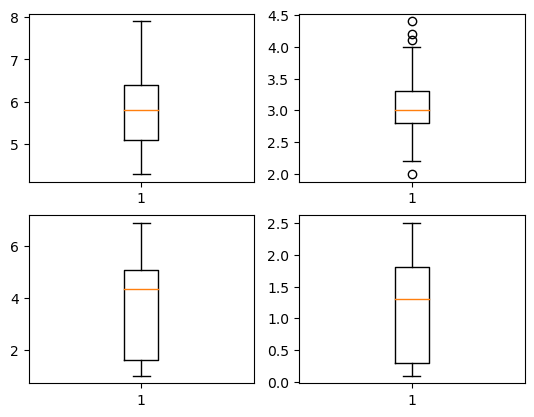

In [5]:
c = 0
for x in df.columns[:-1]:
    print('Column',c,' --> ',x)
    c = c+1
    plt.subplot(2,2,c)
    plt.boxplot(df[x])

<AxesSubplot: >

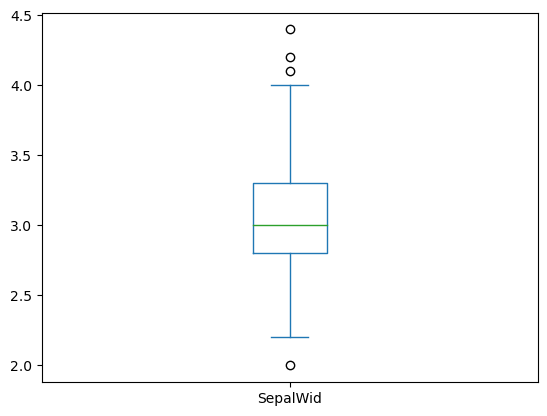

In [6]:
df['SepalWid'].plot.box()

In [7]:
q3 = np.quantile(df['SepalWid'], 0.75)
q1 = np.quantile(df['SepalWid'], 0.25)
IQR = q3 - q1
eiqr = IQR*1.5
ub = q3 + eiqr
lb = q1 - eiqr

In [8]:
df['SepalWid'][(df['SepalWid'] < lb) | (df['SepalWid'] > ub)] = df['SepalWid'].median()

<AxesSubplot: >

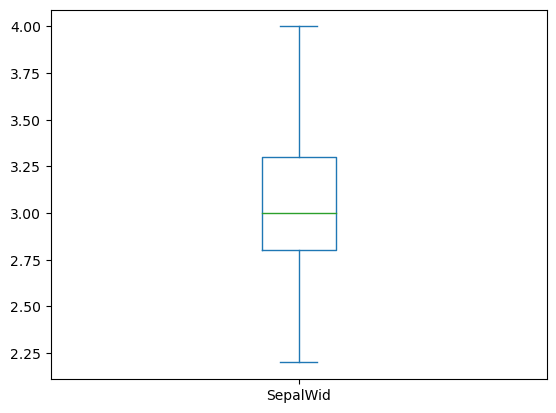

In [9]:
df['SepalWid'].plot.box()

<AxesSubplot: ylabel='Density'>

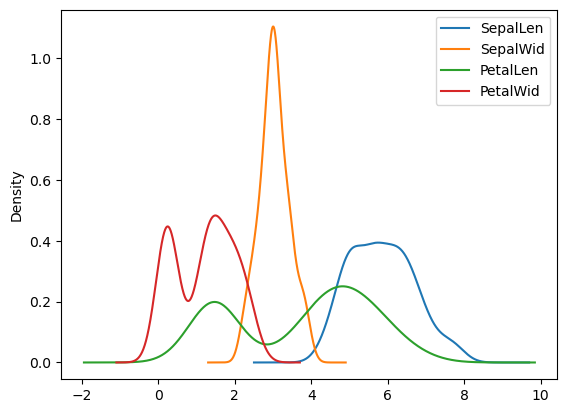

In [10]:
df.plot.density()

Column 0  -->  SepalLen
Column 1  -->  SepalWid
Column 2  -->  PetalLen
Column 3  -->  PetalWid


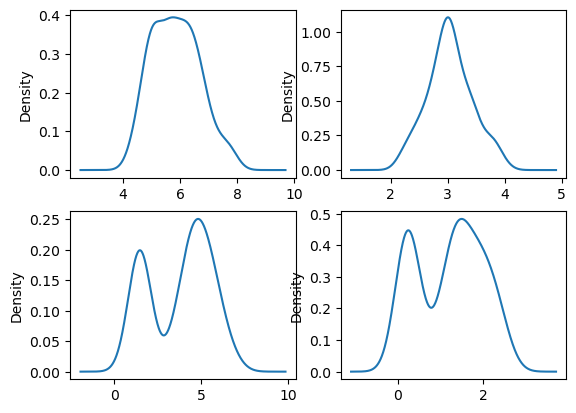

In [13]:
c = 0
for x in df.columns[:-1]:
    print('Column',c,' --> ',x)
    c = c+1
    plt.subplot(2,2,c)
    df[x].plot.density()

In [14]:
le = sk.LabelEncoder()
x1 = df['Species'].to_numpy()
x1 = x1.reshape(-1,1)
x1 = le.fit_transform(x1)
df['Species'] = x1
df

,SepalLen,SepalWid,PetalLen,PetalWid,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [15]:
sc = sk.StandardScaler()
X = pd.DataFrame(sc.fit_transform(df.iloc[:,:-1]))

In [16]:
Y = df['Species']

<AxesSubplot: ylabel='Density'>

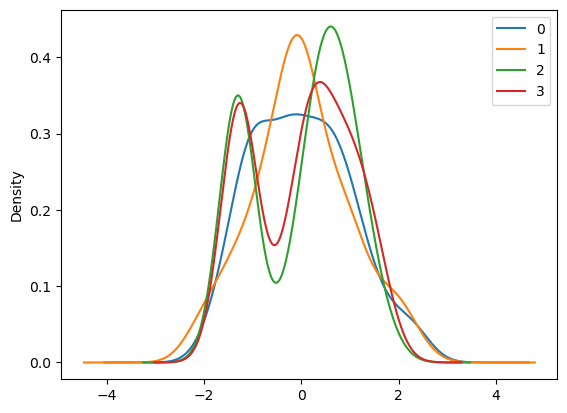

In [17]:
X.plot.density()

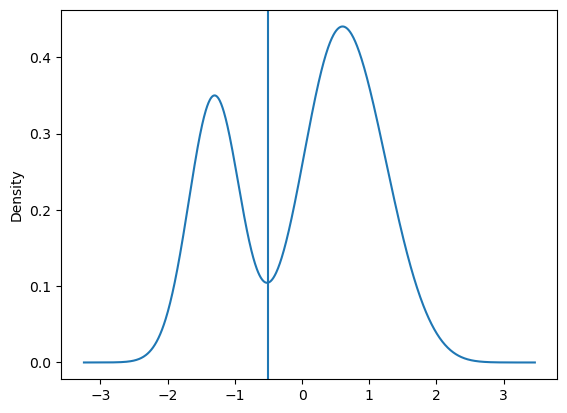

In [18]:
X[2].plot.density()
plt.axvline(x=-0.5)

In [19]:
X[2] = X[2].apply(lambda x:0 if x<-0.5 else 1)

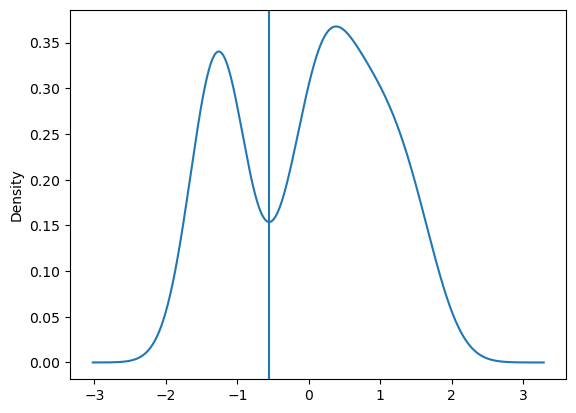

In [20]:
X[3].plot.density()
plt.axvline(x=-0.55)

In [21]:
X[3] = X[3].apply(lambda x:0 if x<-0.55 else 1)

In [25]:
X

,0,1,2,3
0,-0.900681,1.194185,0,0
1,-1.143017,-0.092652,0,0
2,-1.385353,0.422083,0,0
3,-1.506521,0.164715,0,0
4,-1.021849,1.451553,0,0
...,...,...,...,...
145,1.038005,-0.092652,1,1
146,0.553333,-1.379490,1,1
147,0.795669,-0.092652,1,1
148,0.432165,0.936818,1,1


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
mdl1 = SVC()
mdl1.fit(X,Y)
print('Cross Value Score --> ',cross_val_score(SVC(gamma=1),X,Y,cv=5))
print('Accuracy Score --> ',mdl1.score(X,Y))

In [ ]:
mdl2 = RandomForestClassifier()
mdl2.fit(X,Y)
print('Cross Value Score --> ',cross_val_score(RandomForestClassifier(max_depth=5),X,Y, cv=5))
print('Accuracy Score --> ',mdl2.score(X,Y))

In [ ]:
mdl3 = KNeighborsClassifier()
mdl3.fit(X,Y)
print('Cross Value Score --> ',cross_val_score(KNeighborsClassifier(n_neighbors=20),X,Y, cv=5))
print('Accuracy Score --> ',mdl3.score(X,Y))

In [ ]:
mdl4 = DecisionTreeClassifier()
mdl4.fit(X,Y)
print('Cross Value Score --> ',cross_val_score(DecisionTreeClassifier(),X,Y, cv=5))
print('Accuracy Score --> ',mdl4.score(X,Y))

In [ ]:
mdl5 = LogisticRegression()
mdl5.fit(X,Y)
print('Cross Value Score --> ',cross_val_score(LogisticRegression(),X,Y, cv=5))
print('Accuracy Score --> ',mdl5.score(X,Y))